# Regularization

Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 


In [2]:
path = "/home/saddamhussain/Downloads"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df

df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())
df.drop('car name',1,inplace=True)
df.shape
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


In [3]:
y=df['mpg']
x=df.iloc[: ,1:]

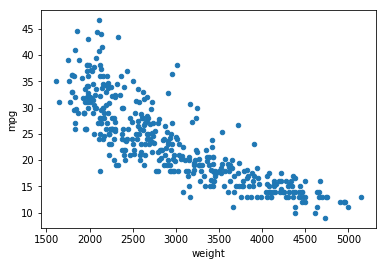

In [4]:
df.plot(kind='scatter',  x='weight', y='mpg')

In [5]:
#x

In [6]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [7]:
# Simple function to evaluate the coefficients of a regression      
def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept: {}".format(intercept))
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

Final score (RMSE): 3.001934598586077
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
model year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200155


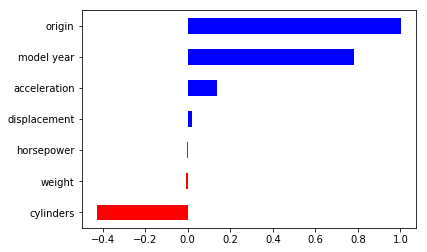

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression 

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values)
names.remove("mpg")
print(names)
report_coef(names,regressor.coef_,regressor.intercept_)

# L1 Regularization

L1 Regularization, also called LASSO (Least Absolute Shrinkage and Selection Operator) is should be used to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0. When a weight is near 0, the program drops it from the network. Dropping weighted connections will create a sparse neural network.

Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons. Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary. If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

L1 is implemented by adding the following error to the objective to minimize:

$$ E_1 = \alpha \sum_w{ |w| } $$
The following code demonstrates lasso regression. Notice the effect of the coefficients compared to the previous section that used linear regression.

import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.2)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

# l2 regularization

You should use Tikhonov/Ridge/L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values. The lower weight values will typically lead to less overfitting.

$$ E_2 = \alpha \sum_w{ w^2 } $$
Like the L1 algorithm, the $\alpha$ value determines how important the L2 objective is compared to the neural network’s error. Typical L2 values are below 0.1 (10%). The main calculation performed by L2 is the summing of the squares of all of the weights. The bias values are not summed.

The following code uses L2 with linear regression (Ridge regression):

import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

# ElasticNet Regularization

Final score (RMSE): 3.045089996077501


,coef,positive
cylinders,-0.274010,False
weight,-0.007303,False
horsepower,-0.003231,False
displacement,0.016194,True
acceleration,0.132348,True
model year,0.777482,True
origin,0.782781,True


Intercept: -18.389355690429767


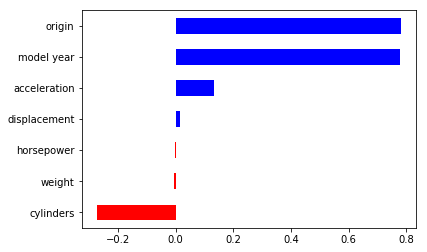

In [11]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)